## Hoops and Stats: Unveiling the Secrets of NCAA Basketball Success

### By Daniel Lightner and Marcus Amerine

The College Basketball Dataset consists of statistics from NCAA Division I basketball teams across the 2013 to 2023 seasons, excluding the 2020 season, which was not played due to the Coronavirus pandemic. This dataset combines data from the 2013-2019 seasons and the 2021-2023 seasons. It includes a variety of performance metrics, such as adjusted offensive and defensive efficiency, shooting percentages, and wins. Analyzing this dataset allows us to uncover factors that contribute to a team's success in the NCAA tournament.

All of the variables within the cbb.csv file

- **TEAM**: The name of the Division I college basketball school.
- **CONF**: The Athletic Conference in which the school participates (e.g., ACC, Big Ten).
- **G**: Total number of games played by the team in the season.
- **W**: Total number of games won by the team in the season.
- **ADJOE**: Adjusted Offensive Efficiency; a measure of points scored per 100 possessions against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; a measure of points allowed per 100 possessions against average offenses. 
- **BARTHAG**: Power Rating indicating the team's chance of beating an average Division I team.
- **EFG_O**: Effective Field Goal Percentage for shots taken by the team.
- **EFG_D**: Effective Field Goal Percentage allowed by the team.
- **TOR**: Turnover Percentage Allowed; the rate at which opponents commit turnovers against the team.
- **TORD**: Turnover Percentage Committed; the rate at which the team commits turnovers.
- **ORB**: Offensive Rebound Rate; the percentage of available offensive rebounds secured by the team.
- **DRB**: Defensive Rebound Rate; the percentage of available defensive rebounds secured by the team.
- **FTR**: Free Throw Rate; the frequency with which the team shoots free throws per field goal attempt.
- **FTRD**: Free Throw Rate Allowed; the frequency with which opponents shoot free throws against the team.
- **2P_O**: Two-Point Shooting Percentage for shots taken by the team.
- **2P_D**: Two-Point Shooting Percentage allowed by the team.
- **3P_O**: Three-Point Shooting Percentage for shots taken by the team.
- **3P_D**: Three-Point Shooting Percentage allowed by the team.
- **ADJ_T**: Adjusted Tempo; an estimate of possessions per 40 minutes against average tempo.
- **WAB**: Wins Above Bubble; indicates how many wins above the cut-off for NCAA tournament qualification a team has.
- **POSTSEASON**: The round in which the team was eliminated in the NCAA tournament (e.g., R64, S16).
- **SEED**: The seed assigned to the team in the NCAA March Madness Tournament.
- **YEAR**: The season year of the data (e.g., 2021).


### Key Variables for Analysis - These variables are important because they will be explored further (either here or later).

- **ADJOE**: Adjusted Offensive Efficiency; helps evaluate a team's scoring capabilities against average defenses.
- **ADJDE**: Adjusted Defensive Efficiency; provides insight into how well a team prevents scoring against average offenses.
- **WAB**: Wins Above Bubble; indicates a team's performance relative to the NCAA tournament qualification threshold.
- **SEED**: The seed assigned to a team in the NCAA tournament, reflecting their perceived strength.
- **POSTSEASON**: The round where the team was eliminated, indicating tournament success.
- **EFG_O**: Effective Field Goal Percentage for shots taken by the team; a crucial metric for shooting efficiency.
- **3P_O**: Three-Point Shooting Percentage; important for understanding a team's ability to score from beyond the arc.
- **ADJ_T**: Adjusted Tempo; assesses the pace of play and how it may affect game outcomes.
- **BARTHAG**: Power Rating; offers a comparative measure of a team's strength against average Division I teams.
- **FTR**: Free Throw Rate; shows how often a team capitalizes on free throw opportunities, affecting overall scoring.



If you are interested in viewing it yourself, feel free to take a look at it: https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset

In [2]:
import pandas as pd
df = pd.read_csv('cbb.csv')

In [27]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

POSTSEASON    2843
SEED          2843
dtype: int64


### Variables of Interest

**1. Adjusted Offensive Efficiency (ADJOE)**
- **Importance**: ADJOE is crucial for understanding how effectively a team can score against average defenses. It helps identify offensive strengths and weaknesses, which are vital for predicting tournament performance.
- **Questions for Future Analysis**:
  - How does ADJOE correlate with a team's postseason success?
  - Does a higher ADJOE significantly improve a team's chances of advancing past the first round of the NCAA tournament?
  - How does ADJOE vary between different conferences?

**2. Adjusted Defensive Efficiency (ADJDE)**
- **Importance**: ADJDE measures a team's ability to prevent scoring against average offenses. Analyzing this variable can help us understand defensive strategies that contribute to winning games.
- **Questions for Future Analysis**:
  - What is the relationship between ADJDE and the number of wins a team achieves in the regular season?
  - How does ADJDE influence a team's performance in high-stakes tournament games?
  - Are teams with higher ADJDE less likely to be eliminated early in the NCAA tournament?

**3. Wins Above Bubble (WAB)**
- **Importance**: WAB indicates how a team's performance stacks up against the cutoff for NCAA tournament qualification. It provides insights into teams' standings and their likelihood of making the postseason.
- **Questions for Future Analysis**:
  - How do WAB scores differ across various conferences and what does this suggest about their competitiveness?
  - Can WAB be used to predict future tournament appearances for teams over several seasons?
  - What role does WAB play in determining seeding for the NCAA tournament?


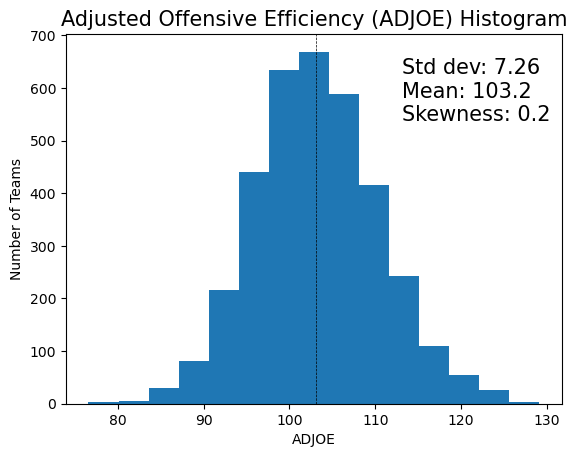

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(df.ADJOE, bins=int(round(df.ADJOE.count()**(1/3),0)))
text = 'Std dev: ' + str(round(df.ADJOE.std(), 2)) + '\n' + 'Mean: ' + str(round(df.ADJOE.mean(), 1)) + '\n' + 'Skewness: ' + str(round(df.ADJOE.skew(), 1))
plt.text(0.65, 0.7, text, fontsize=15, transform=plt.gcf().transFigure)
plt.title("Adjusted Offensive Efficiency (ADJOE) Histogram", fontsize=15)
plt.xlabel("ADJOE")
plt.ylabel("Number of Teams")
plt.axvline(df.ADJOE.mean(), color='k', linestyle='dashed', linewidth=0.5)
plt.show()


The ADJOE variables appears to be normally distributed, following that bell curve shape. Its skewness is 0.2, meaning it's almost close to symmetrical.

In [4]:
df['ADJOE'].isnull().sum()

0

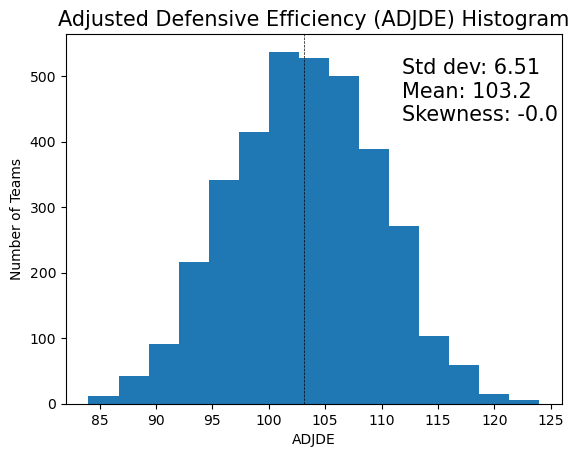

In [5]:
plt.hist(df.ADJDE, bins=int(round(df.ADJDE.count()**(1/3),0)))
text = 'Std dev: ' + str(round(df.ADJDE.std(), 2)) + '\n' + 'Mean: ' + str(round(df.ADJDE.mean(), 1)) + '\n' + 'Skewness: ' + str(round(df.ADJDE.skew(), 1))
plt.text(0.65, 0.7, text, fontsize=15, transform=plt.gcf().transFigure)
plt.title("Adjusted Defensive Efficiency (ADJDE) Histogram", fontsize=15)
plt.xlabel("ADJDE")
plt.ylabel("Number of Teams")
plt.axvline(df.ADJDE.mean(), color='k', linestyle='dashed', linewidth=0.5)
plt.show()


The ADJDE variable appears to be normally distributed. The skewness is 0.0, meaning its almost perfectly symmetrical.

In [6]:
df['ADJDE'].isnull().sum()

0

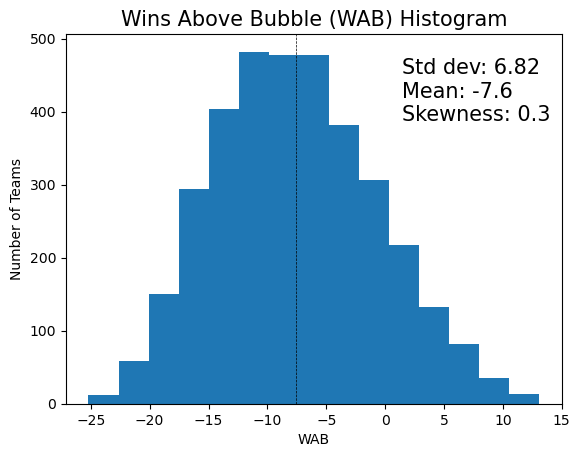

In [7]:

plt.hist(df.WAB, bins=int(round(df.WAB.count()**(1/3),0)))
text = 'Std dev: ' + str(round(df.WAB.std(), 2)) + '\n' + 'Mean: ' + str(round(df.WAB.mean(), 1)) + '\n' + 'Skewness: ' + str(round(df.WAB.skew(), 1))
plt.text(0.65, 0.7, text, fontsize=15, transform=plt.gcf().transFigure)
plt.title("Wins Above Bubble (WAB) Histogram", fontsize=15)
plt.xlabel("WAB")
plt.ylabel("Number of Teams")
plt.axvline(df.WAB.mean(), color='k', linestyle='dashed', linewidth=0.5)
plt.show()


The WAB variable has a standard deviation of 6.82 and a skewness of 0.3, indicating a slight positive skew. With a mean of -7.6, this suggests that while most teams are underperforming relative to the tournament cutoff, a few teams are performing significantly better, leading to a distribution that remains relatively normal.

In [8]:
df['WAB'].isnull().sum()


0

In [9]:
df_corr = df[['ADJOE', 'ADJDE', 'WAB']]
correlation_matrix = df_corr.corr(method='pearson')
print(correlation_matrix)


          ADJOE     ADJDE       WAB
ADJOE  1.000000 -0.494039  0.821904
ADJDE -0.494039  1.000000 -0.799711
WAB    0.821904 -0.799711  1.000000


In [10]:
from scipy.stats import pearsonr

# Sample correlation and p-value calculations between pairs
# For ADJOE and WAB
corr_adjoe_wab, p_value_adjoe_wab = pearsonr(df['ADJOE'], df['WAB'])
print(f"Correlation between ADJOE and WAB: {corr_adjoe_wab}, p-value: {p_value_adjoe_wab}")

# For ADJDE and WAB
corr_adjde_wab, p_value_adjde_wab = pearsonr(df['ADJDE'], df['WAB'])
print(f"Correlation between ADJDE and WAB: {corr_adjde_wab}, p-value: {p_value_adjde_wab}")

# For ADJOE and ADJDE
corr_adjoe_adjde, p_value_adjoe_adjde = pearsonr(df['ADJOE'], df['ADJDE'])
print(f"Correlation between ADJOE and ADJDE: {corr_adjoe_adjde}, p-value: {p_value_adjoe_adjde}")


Correlation between ADJOE and WAB: 0.8219042652940656, p-value: 0.0
Correlation between ADJDE and WAB: -0.7997105993662943, p-value: 0.0
Correlation between ADJOE and ADJDE: -0.49403865347608844, p-value: 3.140645596506229e-216


In [11]:
mean_adjoe = df['ADJOE'].mean()
elite_offensive_teams = df[df['ADJOE'] > mean_adjoe + 20][['TEAM', 'YEAR', 'ADJOE', 'ADJDE', 'WAB']]
elite_offensive_teams = elite_offensive_teams.sort_values(by='ADJOE', ascending=False)
print(elite_offensive_teams)


                TEAM  YEAR  ADJOE  ADJDE   WAB
1          Wisconsin  2015  129.1   93.6  11.3
11         Villanova  2018  128.4   94.1  10.6
2195    Oklahoma St.  2017  126.8  102.3   3.3
2307            Duke  2014  125.9   98.6   6.5
2458         Gonzaga  2021  125.4   89.8   8.5
15        Notre Dame  2015  125.3   98.6   8.6
2118       Creighton  2014  125.2  101.9   5.6
7               Duke  2015  125.2   90.6  10.7
35          Michigan  2014  125.0   99.9   7.7
2459            Iowa  2021  123.5   95.7   5.6
33           Gonzaga  2019  123.4   89.9   7.0
0     North Carolina  2016  123.3   94.9   8.6
2412        Michigan  2017  123.3   97.6   3.8
2415          Purdue  2018  123.2   95.7   7.6
2456          Baylor  2021  123.2   94.5   6.6
2106        Kentucky  2016  123.2   95.1   5.0
3169         Gonzaga  2023  123.2   99.0   6.6


In [12]:
mean_adjde = df['ADJDE'].mean()
elite_defensive_teams = df[df['ADJDE'] > mean_adjde + 15][['TEAM', 'YEAR', 'ADJOE', 'ADJDE', 'WAB']]
elite_defensive_teams = elite_defensive_teams.sort_values(by='ADJDE', ascending=False)
print(elite_defensive_teams)


                        TEAM  YEAR  ADJOE  ADJDE   WAB
814       North Carolina A&T  2017   95.2  124.0 -25.2
1368             Alabama A&M  2017   90.4  123.6 -24.0
258              USC Upstate  2018  105.1  123.0 -19.5
1556           Grambling St.  2014   94.5  122.4 -19.3
1756           Grambling St.  2013   76.6  121.4 -24.3
2530  Mississippi Valley St.  2021   80.0  120.8 -17.5
1605  Maryland Eastern Shore  2014   99.2  120.6 -18.7
3282       Houston Christian  2023  100.5  120.2 -17.9
1170             The Citadel  2015  101.4  120.0 -14.7
956                   Bryant  2018   98.3  119.8 -23.0
3151     Arkansas Pine Bluff  2022   97.6  119.8 -17.4
1522                 Cornell  2014  101.2  119.4 -18.5
822                   Howard  2018   98.4  119.4 -18.6
1196                 Samford  2018  106.5  119.4 -15.3
828       South Carolina St.  2018   96.1  119.2 -17.3
1302          Incarnate Word  2019   97.2  119.2 -20.2
819             Delaware St.  2018   90.3  119.2 -24.1
1374  Miss

### Summary of Variable Analysis

The analysis of the three variables—Adjusted Offensive Efficiency (ADJOE), Adjusted Defensive Efficiency (ADJDE), and Wins Above Bubble (WAB)—reveals intriguing insights. While ADJOE and WAB show a strong positive correlation (0.82), suggesting that teams with better offensive efficiency are likely to have higher postseason prospects, the correlation between ADJDE and WAB is notably negative at -0.799. This indicates that teams with higher defensive efficiency might struggle to secure enough wins for a strong postseason position.

This relationship highlights an important point in basketball: a strong defense doesn’t guarantee tournament success. Teams with high Adjusted Defensive Efficiency (ADJDE) may excel at shutting down opponents but can struggle to score enough points to win games, much like a team that plays tough defense but can’t make shots. In NCAA basketball, where every game is crucial, balancing offensive firepower with solid defense is essential for postseason success. It’s also important to consider the level of competition teams face, as it can greatly impact performance. Teams in tougher conferences may need both strong offensive and defensive stats to stand out.


NOTE: We will definitely dive into more statistics such as tempo, 3pt shot attempts/makes, and much more.

In [13]:
st_francis_stats = df[df['TEAM'] == 'St. Francis PA']
relevant_columns = ['TEAM', 'YEAR', 'ADJOE', 'ADJDE', 'WAB', 'EFG_O', 'EFG_D', 'FTR', 'W', 'G'] 
st_francis_relevant_stats = st_francis_stats[relevant_columns]
st_francis_relevant_stats_sorted = st_francis_relevant_stats.sort_values(by='YEAR')
print(st_francis_relevant_stats)
#just playing with the data


                TEAM  YEAR  ADJOE  ADJDE   WAB  EFG_O  EFG_D   FTR   W   G
936   St. Francis PA  2015   97.9  101.8 -10.3   50.1   49.5  34.6  15  31
945   St. Francis PA  2016   99.6  113.2 -13.5   48.3   50.8  38.5  12  29
954   St. Francis PA  2017  101.5  109.1 -11.9   52.8   50.4  29.6  17  33
963   St. Francis PA  2018  104.1  110.2  -7.7   52.8   53.6  33.5  18  29
972   St. Francis PA  2019  104.9  112.3  -9.0   48.8   53.8  35.0  18  31
1697  St. Francis PA  2014   95.8  110.7 -15.8   47.6   52.4  32.7  10  31
1922  St. Francis PA  2013   92.1  111.2 -19.2   48.2   53.0  31.6   5  29
2576  St. Francis PA  2021   94.7  107.2 -13.0   47.9   51.5  33.7   6  22
3128  St. Francis PA  2022   94.5  109.5 -16.6   46.9   52.4  29.8   9  29
3322  St. Francis PA  2023  100.7  115.1 -14.3   51.9   51.9  32.8  13  29


In [14]:
df.corr(numeric_only=True)

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
G,1.000000,0.608824,0.458818,-0.358563,0.470220,0.223691,-0.313113,-0.235440,0.009625,0.271317,...,0.187947,-0.051500,0.180954,-0.323567,0.200767,-0.162106,-0.074646,0.366441,-0.363497,-0.244136
W,0.608824,1.000000,0.736713,-0.655700,0.794127,0.590957,-0.585786,-0.439382,0.135311,0.309950,...,0.156508,-0.255937,0.551565,-0.521364,0.418986,-0.444215,-0.025344,0.859995,-0.540782,0.004553
ADJOE,0.458818,0.736713,1.000000,-0.494039,0.863203,0.723180,-0.306172,-0.597191,-0.121562,0.253776,...,0.095396,-0.307819,0.638174,-0.296911,0.559109,-0.193225,0.056921,0.821904,-0.744609,0.018464
ADJDE,-0.358563,-0.655700,-0.494039,1.000000,-0.841425,-0.195558,0.785367,0.172985,-0.269400,-0.291944,...,-0.082848,0.176116,-0.234620,0.711324,-0.068731,0.573964,0.195574,-0.799711,0.690730,0.020903
BARTHAG,0.470220,0.794127,0.863203,-0.841425,1.000000,0.532123,-0.611977,-0.447057,0.066780,0.304284,...,0.105000,-0.286142,0.504225,-0.564498,0.365767,-0.431831,-0.073865,0.930164,-0.827418,-0.000407
EFG_O,0.223691,0.590957,0.723180,-0.195558,0.532123,1.000000,-0.104251,-0.371265,-0.158853,-0.145350,...,-0.066600,-0.366404,0.892808,-0.086651,0.749952,-0.094635,0.108285,0.540421,-0.231130,0.140777
EFG_D,-0.313113,-0.585786,-0.306172,0.785367,-0.611977,-0.104251,1.000000,0.051693,-0.058905,-0.363482,...,-0.199835,0.067946,-0.128741,0.905281,-0.038543,0.720319,0.234568,-0.614681,0.367349,0.149291
TOR,-0.235440,-0.439382,-0.597191,0.172985,-0.447057,-0.371265,0.051693,1.000000,0.149789,0.172764,...,0.161506,0.284840,-0.307227,0.044391,-0.310053,0.043810,-0.067096,-0.436574,0.266311,-0.118077
TORD,0.009625,0.135311,-0.121562,-0.269400,0.066780,-0.158853,-0.058905,0.149789,1.000000,0.161732,...,0.112047,0.358317,-0.099908,-0.018906,-0.175285,-0.108381,-0.031180,0.111490,-0.002099,-0.109105
ORB,0.271317,0.309950,0.253776,-0.291944,0.304284,-0.145350,-0.363482,0.172764,0.161732,1.000000,...,0.334411,0.206197,-0.108346,-0.372845,-0.118274,-0.187496,-0.080415,0.306895,-0.293490,-0.291332


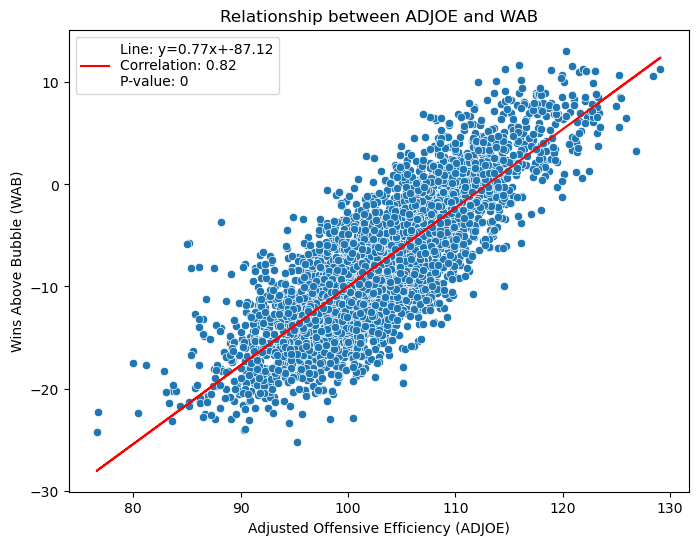

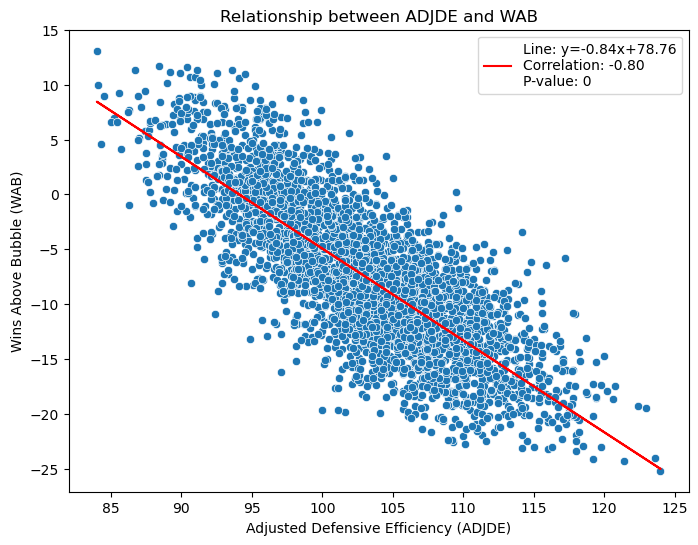

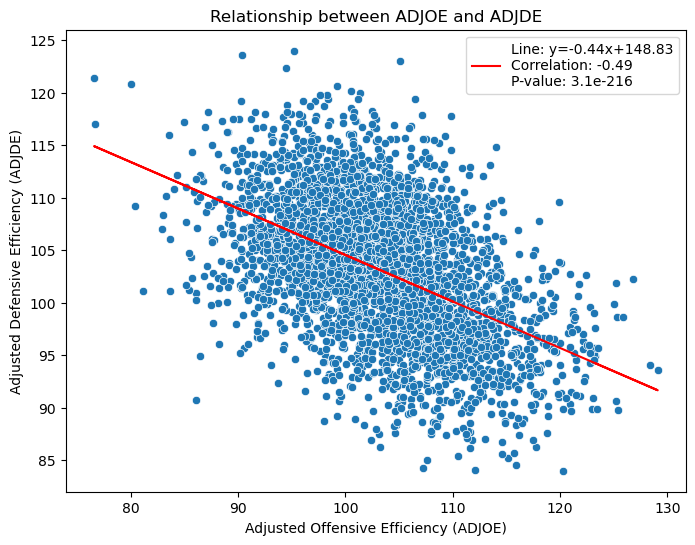

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Assuming data is stored in a DataFrame named `df`
# Filter for the relevant columns
relevant_data = df[['ADJOE', 'ADJDE', 'WAB']]

# Scatterplot 1: ADJOE vs. WAB
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ADJOE', y='WAB', data=relevant_data)
slope, intercept, r_value, p_value, std_err = linregress(relevant_data['ADJOE'], relevant_data['WAB'])
plt.plot(relevant_data['ADJOE'], intercept + slope * relevant_data['ADJOE'], 'r', label=f'Line: y={slope:.2f}x+{intercept:.2f}\nCorrelation: {r_value:.2f}\nP-value: {p_value:.2g}')
plt.title('Relationship between ADJOE and WAB')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Wins Above Bubble (WAB)')
plt.legend()
plt.show()

# Scatterplot 2: ADJDE vs. WAB
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ADJDE', y='WAB', data=relevant_data)
slope, intercept, r_value, p_value, std_err = linregress(relevant_data['ADJDE'], relevant_data['WAB'])
plt.plot(relevant_data['ADJDE'], intercept + slope * relevant_data['ADJDE'], 'r', label=f'Line: y={slope:.2f}x+{intercept:.2f}\nCorrelation: {r_value:.2f}\nP-value: {p_value:.2g}')
plt.title('Relationship between ADJDE and WAB')
plt.xlabel('Adjusted Defensive Efficiency (ADJDE)')
plt.ylabel('Wins Above Bubble (WAB)')
plt.legend()
plt.show()

# Scatterplot 3: ADJOE vs. ADJDE
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ADJOE', y='ADJDE', data=relevant_data)
slope, intercept, r_value, p_value, std_err = linregress(relevant_data['ADJOE'], relevant_data['ADJDE'])
plt.plot(relevant_data['ADJOE'], intercept + slope * relevant_data['ADJOE'], 'r', label=f'Line: y={slope:.2f}x+{intercept:.2f}\nCorrelation: {r_value:.2f}\nP-value: {p_value:.2g}')
plt.title('Relationship between ADJOE and ADJDE')
plt.xlabel('Adjusted Offensive Efficiency (ADJOE)')
plt.ylabel('Adjusted Defensive Efficiency (ADJDE)')
plt.legend()
plt.show()


In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your dataset

# ADJOE and ADJDE
X1 = df[['ADJOE']]
y1 = df['ADJDE']
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()
white_test1 = het_white(model1.resid, model1.model.exog)
bp_test1 = het_breuschpagan(model1.resid, model1.model.exog)
print("ADJOE and ADJDE - White Test: LM Stat =", white_test1[0], ", p-value =", white_test1[1])
print("ADJOE and ADJDE - Breusch-Pagan Test: LM Stat =", bp_test1[0], ", p-value =", bp_test1[1])

# ADJOE and WAB
X2 = df[['ADJOE']]
y2 = df['WAB']
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2, X2).fit()
white_test2 = het_white(model2.resid, model2.model.exog)
bp_test2 = het_breuschpagan(model2.resid, model2.model.exog)
print("ADJOE and WAB - White Test: LM Stat =", white_test2[0], ", p-value =", white_test2[1])
print("ADJOE and WAB - Breusch-Pagan Test: LM Stat =", bp_test2[0], ", p-value =", bp_test2[1])

# ADJDE and WAB
X3 = df[['ADJDE']]
y3 = df['WAB']
X3 = sm.add_constant(X3)
model3 = sm.OLS(y3, X3).fit()
white_test3 = het_white(model3.resid, model3.model.exog)
bp_test3 = het_breuschpagan(model3.resid, model3.model.exog)
print("ADJDE and WAB - White Test: LM Stat =", white_test3[0], ", p-value =", white_test3[1])
print("ADJDE and WAB - Breusch-Pagan Test: LM Stat =", bp_test3[0], ", p-value =", bp_test3[1])


ADJOE and ADJDE - White Test: LM Stat = 4.806555760698089 , p-value = 0.09042107752045925
ADJOE and ADJDE - Breusch-Pagan Test: LM Stat = 0.13764878183626683 , p-value = 0.7106297204177774
ADJOE and WAB - White Test: LM Stat = 7.157906894767467 , p-value = 0.027904886911254336
ADJOE and WAB - Breusch-Pagan Test: LM Stat = 7.121912457668405 , p-value = 0.0076147435115138055
ADJDE and WAB - White Test: LM Stat = 7.731376643200607 , p-value = 0.02094849816956974
ADJDE and WAB - Breusch-Pagan Test: LM Stat = 5.22728534908863 , p-value = 0.022235209631626236


In [19]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='ADJOE~ADJDE', data=df).fit()
model.params

Intercept    160.004841
ADJDE         -0.551156
dtype: float64

In [20]:
white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test
output_df.round(5)

#PAGAN/WHITE TEST for ADJOE & ADJDE

,LM stat,LM p-value,F-stat,F p-value
White,12.30816,0.00212,6.17039,0.00211
Breusch-Pagan,12.16745,0.00049,12.20268,0.00048


In [22]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='ADJOE~WAB', data=df).fit()
model.params


white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test
output_df.round(5)

#PAGAN/WHITE TEST for ADJOE & WAB

,LM stat,LM p-value,F-stat,F p-value
White,3.30374,0.19169,1.65201,0.19181
Breusch-Pagan,0.88007,0.34818,0.87979,0.34832


In [25]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols(formula='ADJDE~WAB', data=df).fit()
model.params


white_test = het_white(model.resid,  model.model.exog)
bp_test = het_breuschpagan(model.resid, model.model.exog)
output_df = pd.DataFrame(columns=['LM stat', 'LM p-value', 'F-stat', 'F p-value'])
output_df.loc['White'] = white_test
output_df.loc['Breusch-Pagan'] = bp_test
output_df.round(5)

#PAGAN/WHITE TEST for ADJDE & WAB

,LM stat,LM p-value,F-stat,F p-value
White,10.38869,0.00555,5.20527,0.00553
Breusch-Pagan,10.36988,0.00128,10.39459,0.00128
